In [1]:
from custom_models.gamornet_keras_module import *
from utility.data_loading import *
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib as mpl
import utility.initialize_tf
mpl.rcParams['figure.figsize'] = [4, 4]
mpl.rcParams['figure.dpi'] = 288

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size':30})

from tensorflow.keras import Model
import keract
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

2.5.0
2.5.0
Tensorflow recognized 1 GPUs


In [2]:
x_califa, y_califa, metadata_califa = load_hdf5_data("califa_s_1.0")
x_califa = np.expand_dims(x_califa, axis=3)
#x_califa = np.expand_dims(x_califa, axis=1)


(79, 100, 100)


E:\Anaconda3\envs\keract\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [3]:
gamornet_tuned_model_path = f"./saved_models/result_models/final/gamornet/transfer_learning/tuned_model_with_reg_complete.hdf5"

gamornet_tuned_model = tf.keras.models.load_model(gamornet_tuned_model_path, custom_objects={"LocalResponseNormalization": LocalResponseNormalization})

model = gamornet_tuned_model

from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

from tf_keras_vis.utils.scores import CategoricalScore
print(np.uint8(y_califa.tolist()))
#np.uint8(y_califa.tolist())
score = CategoricalScore(np.uint8(y_califa.tolist()).tolist())

[1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1
 0 0 1 1 1]


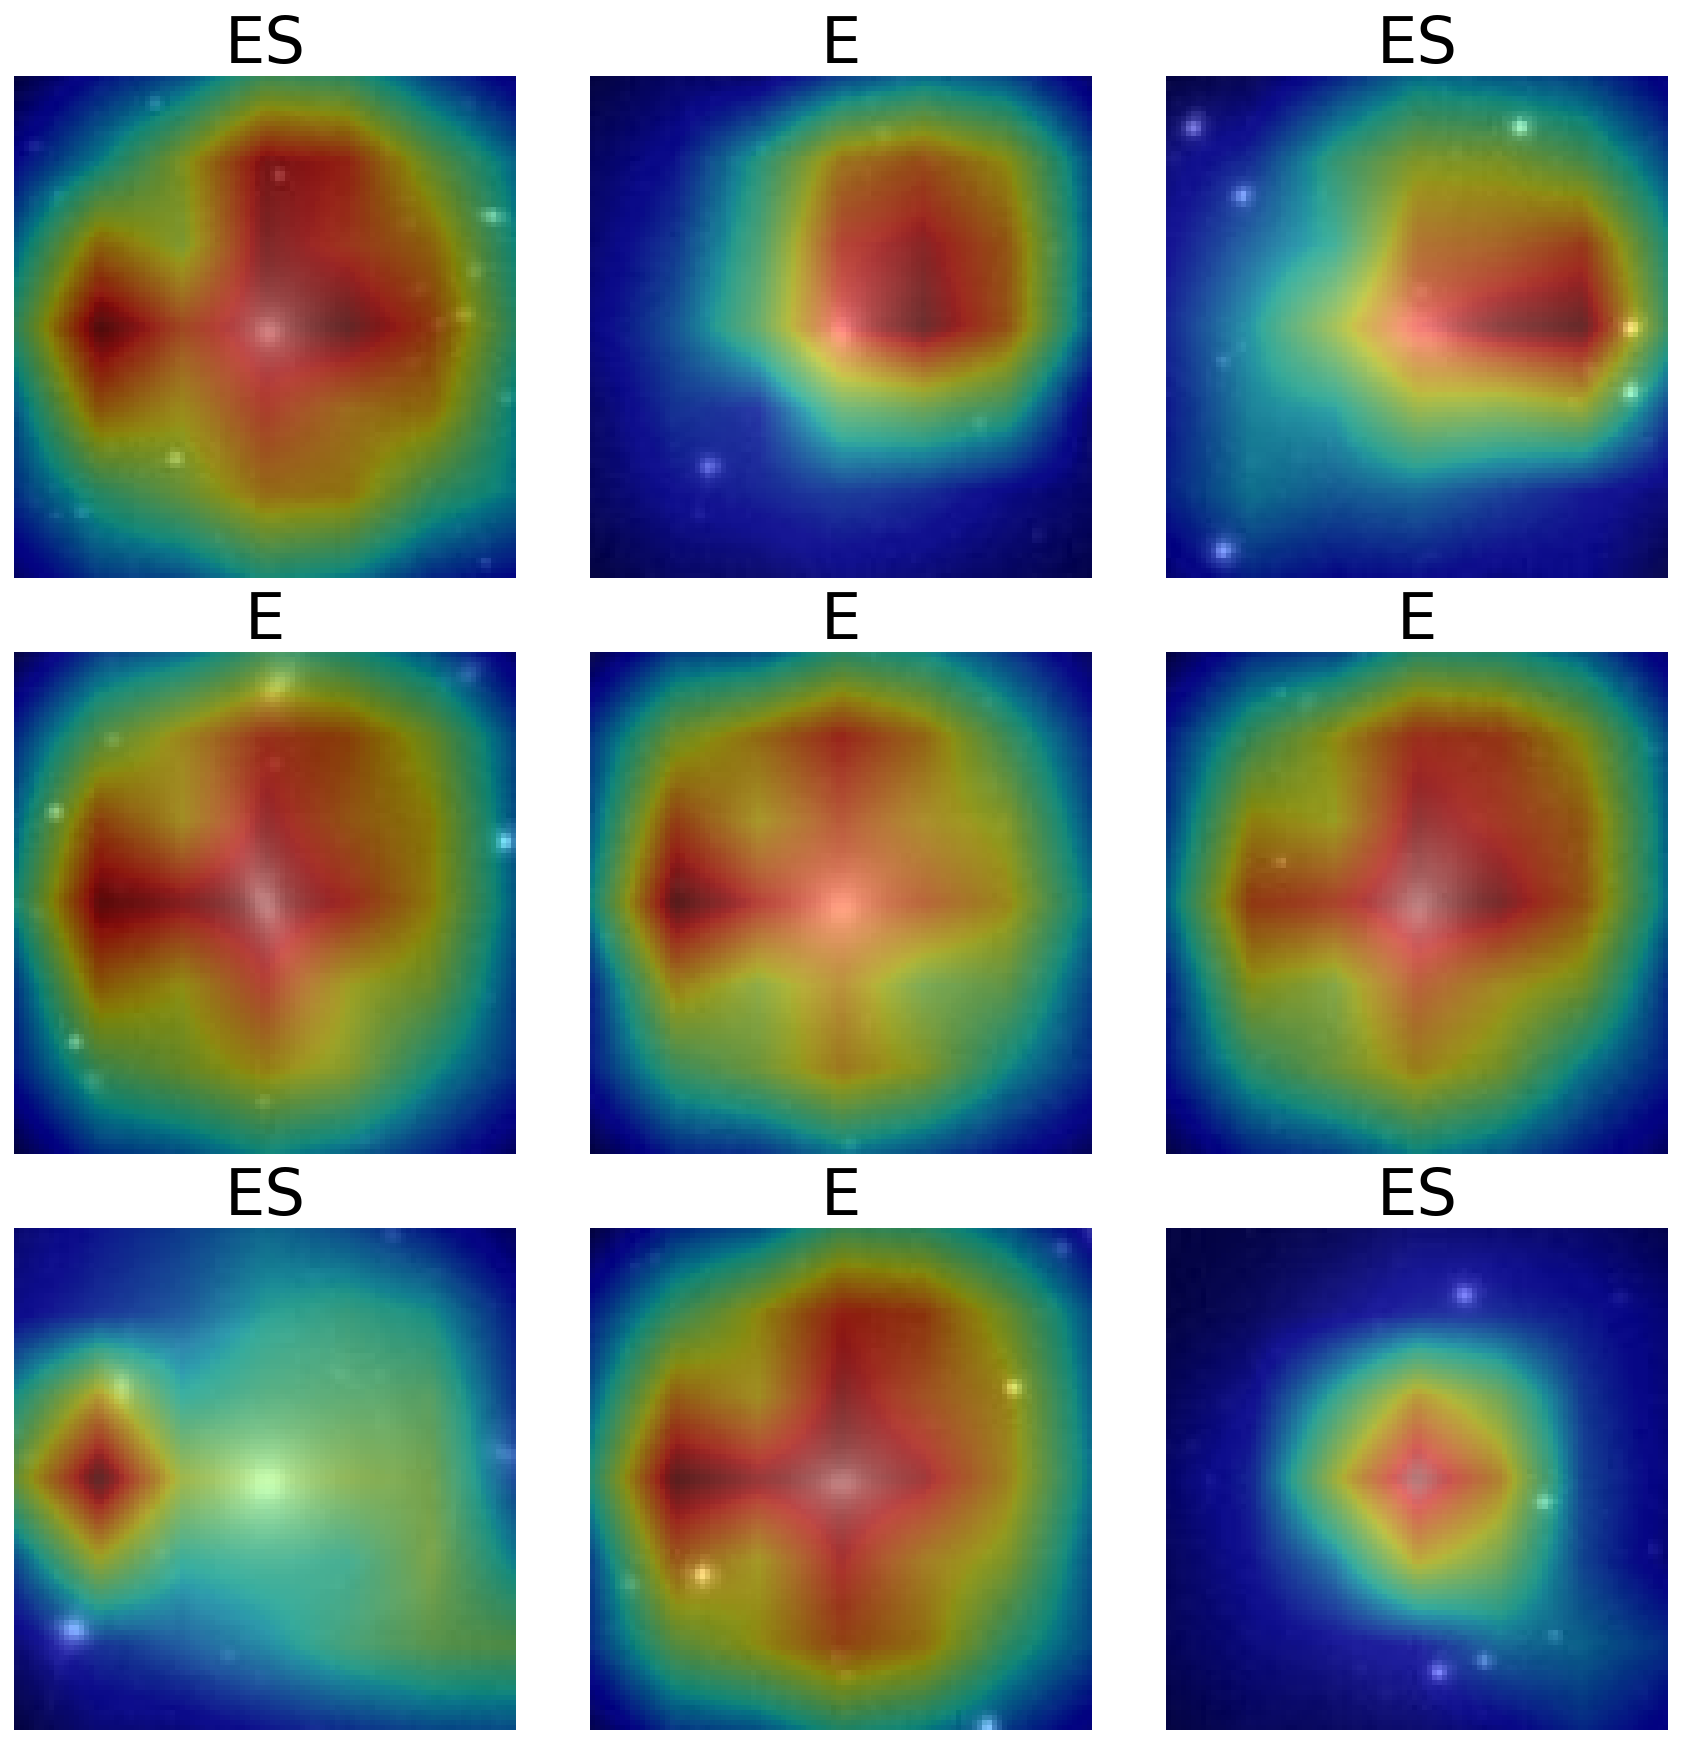

In [32]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from matplotlib import cm
# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              x_califa,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)
# model2 = tf.keras.models.load_model(gamornet_tuned_model_path, custom_objects={"LocalResponseNormalization": LocalResponseNormalization})
# print(Classes(model2.predict(x_califa[:1, :, :, :]).argmax(axis=1)).name)

mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 144
# Render
f, ax = plt.subplots(nrows=3, ncols=3, constrained_layout=True)
ax = ax.flatten()
for i, title in enumerate(metadata_califa['class'][:9]):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(f"{Classes(title).name}", fontsize=32)
    ax[i].imshow(x_califa[i], cmap='gray')
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
#plt.tight_layout()
#plt.savefig('images/gradcam_plus_plus.png')
plt.show()

In [17]:
x_califa[-1:0, :, :, :].shape

(0, 100, 100, 1)

In [37]:
from tensorflow.keras.utilsimport plot_model
plot_model(model)

ModuleNotFoundError: No module named 'tensorflow.keras.utils.vis_utils'